# IMDB Movie Review Classification – Sentiment Analysis
## By Cyril Michino Chege, 3117300, Bocconi University

In [36]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

warnings.filterwarnings('once')
%matplotlib inline

## Data Summary

In [5]:
df = pd.read_csv('data/train.csv')
df.head()

,response,review
0,2,A wonderful little production. <br /><br />The...
1,1,Basically there's a family where a little boy ...
2,1,"This show was an amazing, fresh & innovative i..."
3,1,So im not a big fan of Boll's work but then ag...
4,1,"Kind of drawn in by the erotic scenes, only to..."


In [6]:
df.describe()

,response
count,14911.000000
mean,1.495473
std,0.499996
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   response  14911 non-null  int64 
 1   review    14911 non-null  object
dtypes: int64(1), object(1)
memory usage: 233.1+ KB


## Exploratory Data Analysis

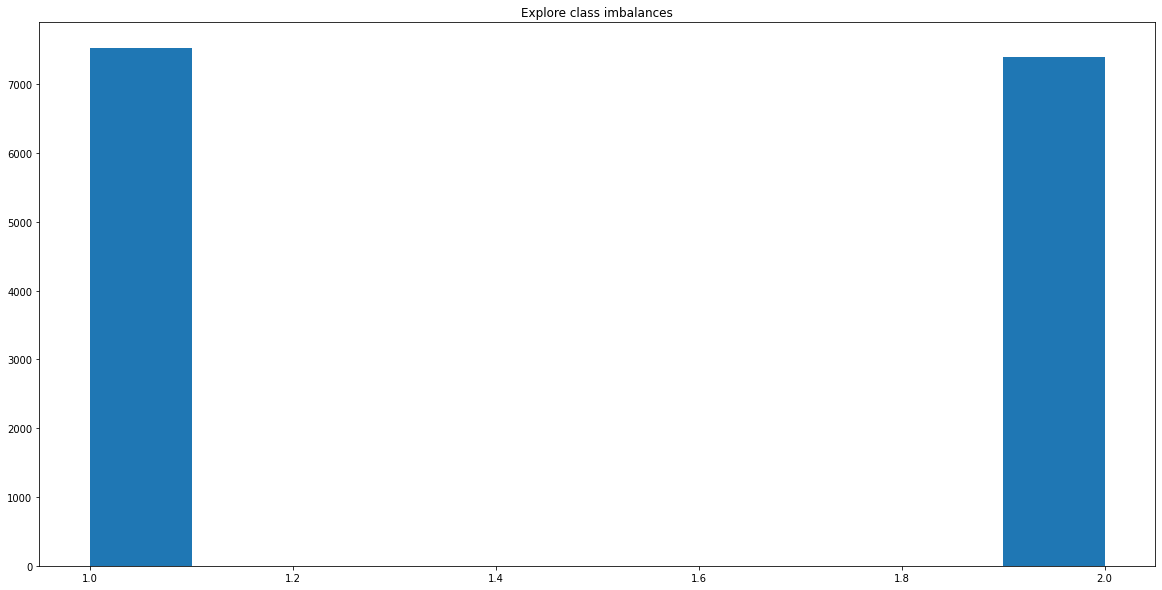

In [9]:
#Exploring the classification distribution to find possible class imbalances
plt.figure(figsize=(20,10))
plt.hist(df.response)
plt.title('Explore class imbalances')
plt.show()

From the visualisation, there are no class imbalances in the data. Our focus shifts to preprocessing the reviews.

/Users/cyrilmichino/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cyrilmichino/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


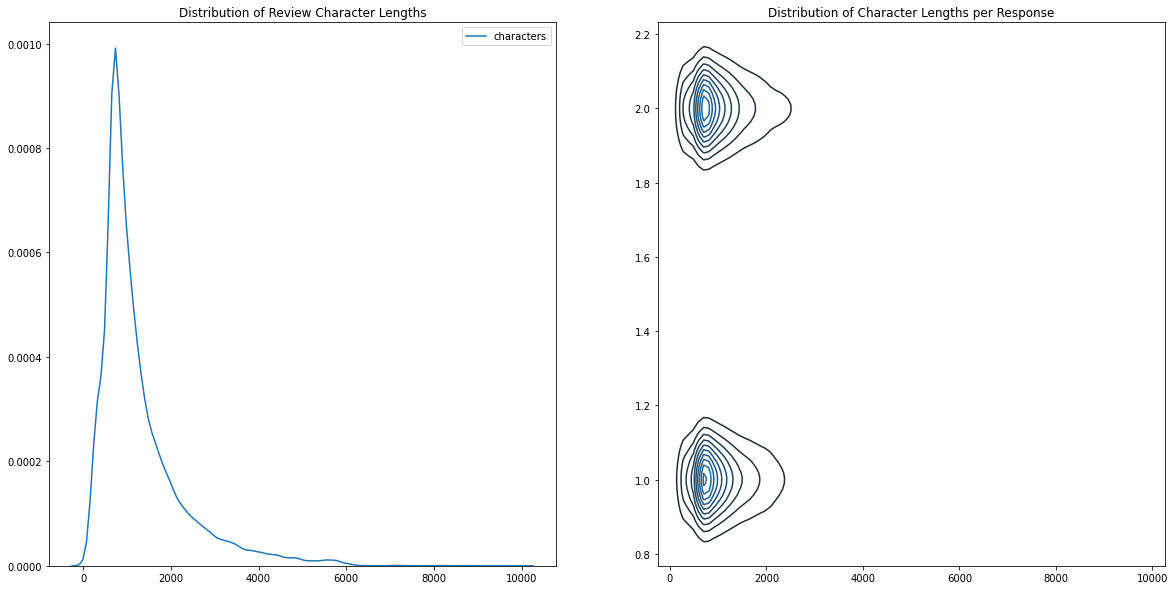

In [27]:
plt.figure(figsize=(20,10))
df['characters'] = df.review.str.len() #Create a column to show the length of the reviews in characters
df

#Explore the distribution of character lengths
plt.subplot(1,2,1)
sns.kdeplot(df.characters)
plt.title('Distribution of Review Character Lengths')

#Explore the relationship between character lengths and review sentiment
plt.subplot(1,2,2)
sns.kdeplot(df[['characters', 'response_str']])
plt.title('Distribution of Character Lengths per Response')

plt.show()

In [15]:
# Tokenise, stopwords, 

5